Градиентный бустинг своими руками
Внимание: в тексте задания произошли изменения - поменялось число деревьев (теперь 50), правило изменения величины шага в задании 3 и добавился параметр random_state у решающего дерева. Правильные ответы не поменялись, но теперь их проще получить. Также исправлена опечатка в функции gbm_predict.

В этом задании будет использоваться датасет boston из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.

Целью задания будет реализовать простой вариант градиентного бустинга над регрессионными деревьями для случая квадратичной функции потерь.

https://notebook.community/MaximMalakhov/coursera/Learning%20on%20marked%20data/Week%204/grad_boosting

In [10]:
from sklearn import datasets, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics          import mean_squared_error

import numpy as np

In [12]:
boston = datasets.load_boston()

X_train = boston.data[:379]
X_test = boston.data[379:]
y_train = boston.target[:379]
y_test = boston.target[379:]

Задание 1
Как вы уже знаете из лекций, бустинг - это метод построения композиций базовых алгоритмов с помощью последовательного добавления к текущей композиции нового алгоритма с некоторым коэффициентом.

Градиентный бустинг обучает каждый новый алгоритм так, чтобы он приближал антиградиент ошибки по ответам композиции на обучающей выборке. Аналогично минимизации функций методом градиентного спуска, в градиентном бустинге мы подправляем композицию, изменяя алгоритм в направлении антиградиента ошибки.

Воспользуйтесь формулой из лекций, задающей ответы на обучающей выборке, на которые нужно обучать новый алгоритм (фактически это лишь чуть более подробно расписанный градиент от ошибки), и получите частный ее случай, если функция потерь L - квадрат отклонения ответа композиции a(x) от правильного ответа y на данном x.

Если вы давно не считали производную самостоятельно, вам поможет таблица производных элементарных функций (которую несложно найти в интернете) и правило дифференцирования сложной функции. После дифференцирования квадрата у вас возникнет множитель 2 — т.к. нам все равно предстоит выбирать коэффициент, с которым будет добавлен новый базовый алгоритм, проигноируйте этот множитель при дальнейшем построении алгоритма.

In [13]:
def grad(y,z):
    return y - z

Задание 2
Заведите массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами).

В цикле от обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). В бустинге зачастую используются сотни и тысячи деревьев, но мы ограничимся 50, чтобы алгоритм работал быстрее, и его было проще отлаживать (т.к. цель задания разобраться, как работает метод). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом.

Попробуйте для начала всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше.

В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X:

def gbm_predict(X): return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X] (считаем, что base_algorithms_list - список с базовыми алгоритмами, coefficients_list - список с коэффициентами перед алгоритмами)
Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью mean_squared_error в sklearn.metrics.

Возведите результат в степень 0.5, чтобы получить RMSE. Полученное значение RMSE — ответ в пункте 2.

In [15]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip
                 (base_algorithms_list, coefficients_list)]) for x in X]
#(считаем, что base_algorithms_list - список с базовыми алгоритмами,
 #coefficients_list - список с коэффициентами перед алгоритмами)
base_algorithms_list = []
coefficients_list = []
error_2 = []

estimator = tree.DecisionTreeRegressor(max_depth=5, random_state = 42)    
estimator.fit(X_train, y_train)
base_algorithms_list.append(estimator)
coefficients_list.append(0.9)
err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
error_2.append(err)
    
for i in range(1, 50):
    estimator = tree.DecisionTreeRegressor(max_depth=5,random_state = 42)    
    
    y_pred = gbm_predict(X_train)
    
    estimator.fit(X_train, grad(y_train, y_pred))
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9)
    
    err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
    error_2.append(err)
    print ('error № ',i,' = ', err,'\n')

error №  1  =  4.671153714252575 

error №  2  =  4.902307279003964 

error №  3  =  4.964147618734462 

error №  4  =  5.20526450047539 

error №  5  =  5.135565602127196 

error №  6  =  5.240746955112687 

error №  7  =  5.289270262665005 

error №  8  =  5.474743913112658 

error №  9  =  5.487351059181247 

error №  10  =  5.493005009464344 

error №  11  =  5.486541185059441 

error №  12  =  5.485319403332965 

error №  13  =  5.491142418867942 

error №  14  =  5.4234289382521625 

error №  15  =  5.455189053902552 

error №  16  =  5.453903636946008 

error №  17  =  5.442535087357115 

error №  18  =  5.451577011033647 

error №  19  =  5.450957836386989 

error №  20  =  5.455454044759808 

error №  21  =  5.452830834182104 

error №  22  =  5.4534823020413565 

error №  23  =  5.456955189013637 

error №  24  =  5.4585969199592395 

error №  25  =  5.4597046298350955 

error №  26  =  5.458441954443328 

error №  27  =  5.459544166421452 

error №  28  =  5.474640780590228 

In [17]:
ans1 = error_2[49]
print (ans1)
with open('grad_boost_ans1.txt', 'w') as file_out:
        file_out.write(str(ans1))

5.455623403859612


Задание 3
Вас может также беспокоить, что двигаясь с постоянным шагом, вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум.

Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Используйте качество работы алгоритма как ответ в пункте 3.

В реальности часто применяется следующая стратегия выбора шага: как только выбран алгоритм, подберем коэффициент перед ним численным методом оптимизации таким образом, чтобы отклонение от правильных ответов было минимальным. Мы не будем предлагать вам реализовать это для выполнения задания, но рекомендуем попробовать разобраться с такой стратегией и реализовать ее при случае для себя.

In [18]:
base_algorithms_list = []
coefficients_list = []
error_3 = []

estimator = tree.DecisionTreeRegressor(max_depth=5, random_state = 42)    
estimator.fit(X_train, y_train)
base_algorithms_list.append(estimator)
coefficients_list.append(0.9)
err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
error_3.append(err)
    
for i in range(1, 50):
    estimator = tree.DecisionTreeRegressor(max_depth=5,random_state = 42)    
    
    y_pred = gbm_predict(X_train)
    
    estimator.fit(X_train, grad(y_train, y_pred))
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9/(1. + i))
    
    err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
    error_3.append(err)
    print ('error № ',i,' = ', err,'\n')

error №  1  =  4.411594948336074 

error №  2  =  4.391183171661546 

error №  3  =  4.458775073285299 

error №  4  =  4.498661031729782 

error №  5  =  4.5168152101676124 

error №  6  =  4.550526944390747 

error №  7  =  4.609092468715132 

error №  8  =  4.6339875745933385 

error №  9  =  4.651558505714779 

error №  10  =  4.659211687810463 

error №  11  =  4.665846192244087 

error №  12  =  4.687756339977889 

error №  13  =  4.705212386904845 

error №  14  =  4.70888638920925 

error №  15  =  4.727160820532567 

error №  16  =  4.738601041184404 

error №  17  =  4.7434294144854805 

error №  18  =  4.747957771408691 

error №  19  =  4.754535803819599 

error №  20  =  4.760702807935853 

error №  21  =  4.76469042919606 

error №  22  =  4.764828870587975 

error №  23  =  4.763080541850576 

error №  24  =  4.763091173078234 

error №  25  =  4.762268473295419 

error №  26  =  4.758055256544697 

error №  27  =  4.768499657813316 

error №  28  =  4.7718046637409675 


In [19]:
ans2 = error_3[49]
print (ans2)
with open('grad_boost_ans2.txt', 'w') as file_out:
        file_out.write(str(ans2))

4.812550945781193


Задание 4
Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn, но для этого задания вы можете использовать любую реализацию.

Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет ответ в п.4):

1. С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно. 2. С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться. 3. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться. 4. С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться


In [20]:
# iteration
err_list = []
coefficients_list = []
base_algorithms_list = []

estimator = tree.DecisionTreeRegressor(max_depth=5, random_state = 42)    
estimator.fit(X_train, y_train)
base_algorithms_list.append(estimator)
coefficients_list.append(0.9)
err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
err_list.append(err)
    
for i in range(1, 100):
    estimator = tree.DecisionTreeRegressor(max_depth=5,random_state = 42)    
    
    y_pred = gbm_predict(X_train)
    
    estimator.fit(X_train, grad(y_train, y_pred))
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9/(1. + i))
    
    err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
    err_list.append(err)
    print (i,)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


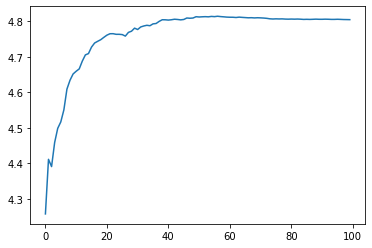

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(0, 100), err_list)

In [23]:
# max_depth
err_list = []
coefficients_list = []
base_algorithms_list = []
depths = range(2, 2*50 + 2, 2)

estimator = tree.DecisionTreeRegressor(max_depth=depths[0], random_state = 42)    
estimator.fit(X_train, y_train)
base_algorithms_list.append(estimator)
coefficients_list.append(0.9)
err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
err_list.append(err)
    
for i in range(1, 50):
    estimator = tree.DecisionTreeRegressor(max_depth=depths[i],random_state = 42)    
    
    y_pred = gbm_predict(X_train)
    
    estimator.fit(X_train, grad(y_train, y_pred))
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9/(1.0 + i))
    
    err = np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))
    err_list.append(err)
    print (i,)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


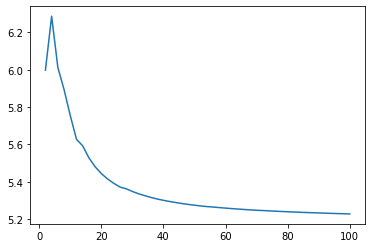

In [24]:
plt.plot(depths, err_list)

In [25]:
ans3 = '2 3'
with open('grad_boost_ans3.txt', 'w') as file_out:
        file_out.write(ans3)

Задание 5
Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии.

Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE. Полученное качество - ответ в пункте 5.

В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.

In [26]:
from sklearn.linear_model import LinearRegression

In [29]:
LineReg = LinearRegression().fit(X_train, y_train)
y_pred = LineReg.predict(X_test)
ans5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(ans5)
with open('grad_boost_ans4.txt', 'w') as file_out:
        file_out.write(str(ans5))

8.254979753549145
